## Building Prediction Models Using Statsmodels and Sklearn

Using only the large schools which have a graduation rate and not a range, prediction modeling was begun. There were about 4,100 schools that fit into this category. There were many missing values which were imputed using the mean. Linear regression was the choosen model to start with and several variations were tried to get better results, including ordinary least squares with statsmodel, Principal Component Analysis (PCA), linear regression with sklearn, linear regression on all variables, linear regression on four key variables, linear regression with multiple lasso penalties, and elastic net. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [126]:
sqrt_y = y[np.sqrt(y) > 8]

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


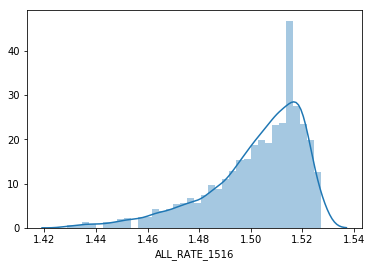

In [133]:
sns.distplot(np.log(np.log(sqrt_y)))

In [2]:
large = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/large_schools.csv')

In [3]:
large.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,92,AL,...,898.0,0.302663,160.0,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651
1,7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,94,AL,...,526.0,0.313655,232.0,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870
2,8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,97,AL,...,565.0,0.321754,72.0,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608
3,9,9,9,ALABAMA,Madison City,10000802198,James Clemens High School,404,96,AL,...,280.0,0.163934,134.0,0.078454,0.0,0.000000,3478.029292,0.000000,0.002635,0.232804
4,12,12,12,ALABAMA,Trussville City,10001301682,Hewitt-Trussville High Sch,381,96,AL,...,799.0,0.554476,28.0,0.019431,2.0,0.001388,3970.929743,0.000000,0.002082,0.231027


## Imputing Mean for Missing Values

In [4]:
#impute mean for numerical vars
large_feat = large[['ALL_RATE_1516', 'total_enrollment', 'ap_ib_de_rate', 'sat_act_rate', 'pass_algebra_rate',
      'geometry_rate', 'algebra2_rate', 'calc_rate', 'chronic_absent_rate', 'activities_funds_rate',
      'sports_rate', 'suspensed_day_rate', 'harassed_rate',
      'non_cert_rate','counselor_rate','absent_teacher_rate']]

In [5]:
imputed_numeric_df = large_feat
for i in range(0, len(large_feat.columns)):
    print('im here:', large_feat.columns[i])
    imputed_numeric_df.iloc[:,i].replace(np.NaN, imputed_numeric_df.iloc[:,i].mean(), inplace=True)

im here: ALL_RATE_1516
im here: total_enrollment
im here: ap_ib_de_rate
im here: sat_act_rate
im here: pass_algebra_rate
im here: geometry_rate
im here: algebra2_rate
im here: calc_rate
im here: chronic_absent_rate
im here: activities_funds_rate
im here: sports_rate
im here: suspensed_day_rate
im here: harassed_rate
im here: non_cert_rate
im here: counselor_rate
im here: absent_teacher_rate


In [6]:
#No missing values
imputed_numeric_df.isna().sum()

ALL_RATE_1516            0
total_enrollment         0
ap_ib_de_rate            0
sat_act_rate             0
pass_algebra_rate        0
geometry_rate            0
algebra2_rate            0
calc_rate                0
chronic_absent_rate      0
activities_funds_rate    0
sports_rate              0
suspensed_day_rate       0
harassed_rate            0
non_cert_rate            0
counselor_rate           0
absent_teacher_rate      0
dtype: int64

In [7]:
imputed_numeric_df.head()

,ALL_RATE_1516,total_enrollment,ap_ib_de_rate,sat_act_rate,pass_algebra_rate,geometry_rate,algebra2_rate,calc_rate,chronic_absent_rate,activities_funds_rate,sports_rate,suspensed_day_rate,harassed_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,92,2967.0,0.228851,0.416245,0.1866,0.242332,0.056623,0.065723,0.144253,434.833734,0.302663,0.053927,0.000337,0.019066,0.001685,0.333651
1,94,1677.0,0.409884,0.288014,0.1866,0.269529,0.045915,0.064997,0.171139,511.925343,0.313655,0.138342,0.000000,0.016920,0.001789,0.346870
2,97,1756.0,0.409884,0.396925,0.1866,0.126424,0.034169,0.068337,0.009112,72676.817158,0.321754,0.041002,0.001139,0.000000,0.002278,0.019608
3,96,1708.0,0.409884,0.340749,0.1866,0.108314,0.014637,0.045667,0.103630,3478.029292,0.163934,0.078454,0.000000,0.000000,0.002635,0.232804
4,96,1441.0,0.409884,0.084663,0.1866,0.203331,0.160305,0.045802,0.104788,3970.929743,0.554476,0.019431,0.001388,0.000000,0.002082,0.231027


## Model 1 - Using statsmodel

In [8]:
y = large['ALL_RATE_1516']

In [9]:
#features to use for prediction came from 
X = imputed_numeric_df

In [83]:
import statsmodels.api as sm

#Regression Model
X = sm.add_constant(X)# adding a constant
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ALL_RATE_1516   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          7.89e-279
Time:                        18:08:44   Log-Likelihood:                -15661.
No. Observations:                4285   AIC:                         3.135e+04
Df Residuals:                    4269   BIC:                         3.146e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    82.0185      1.465     55.975      0.000      79.146      84.891
total_enrollment          0.0007      0.000      3.393      0.001       0.000       0.001
ap_ib_de_rate             3.4016      2.262      1.504      0.133      -1.033       7.836
sat_act_rate             10.1936      1.168      8.729      0.000       7.904      12.483
pass_algebra_rate        10.5882      3.160      3.351      0.001       4.394      16.783
geometry_rate            -3.2995      2.212     -1.492      0.136      -7.636       1.036
algebra2_rate             9.5683      2.135      4.481      0.000       5.382      13.754
calc_rate                16.0698      3.228      4.979      0.000       9.742      22.398
chronic_absent_rate     -23.6375      0.999    -23.661      0.000     -25.596     -21.679
activities_funds_rate -7.727e-05   2.25e-05     -3.435      0.001      -0.000   -3.32e-05
sports_rate               6.7720      0.890      7.613      0.000       5.028       8.516
suspensed_day_rate       -4.4062      0.477     -9.230      0.000      -5.342      -3.470
harassed_rate             8.5940     27.178      0.316      0.752     -44.688      61.876
non_cert_rate           -18.2247      2.142     -8.510      0.000     -22.423     -14.026
counselor_rate          181.0383     76.361      2.371      0.018      31.332     330.745
absent_teacher_rate       1.2855      0.830      1.550      0.121      -0.341       2.912
==============================================================================
Omnibus:                     3081.221   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67449.695
Skew:                          -3.197   Prob(JB):                         0.00
Kurtosis:                      21.355   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#normalize the imputed data
large_scaled = pd.DataFrame(preprocessing.scale(imputed_numeric_df),columns = imputed_numeric_df.columns) 

# PCA
pca = PCA(n_components=12)
pca.fit_transform(large_scaled)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


array([[-0.03903799, -1.58891607, -0.6670932 , ..., -1.23167973,
         0.99505364,  0.83678548],
       [-0.02438154, -0.85155998, -0.00907328, ..., -0.38135053,
         0.99525648, -0.44185932],
       [-1.56638967, -1.9211816 ,  2.66888978, ..., -0.60145007,
         2.19555251, -1.97325135],
       ...,
       [ 1.7590179 , -0.13590437, -0.25277698, ...,  0.44250431,
         0.0829477 , -0.0550687 ],
       [ 1.75537394,  0.03900465, -0.34180382, ..., -0.48154742,
        -0.12888693,  1.0312433 ],
       [ 0.76627668, -0.11448163,  1.14393986, ..., -0.19116985,
        -0.70380415, -0.03946169]])

In [16]:
print(sum(pca.explained_variance_ratio_[0:12]))

0.8387412393516933


## Model 2 - Using sklearn linear regression on all variables

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [85]:
lm = LinearRegression()

In [86]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lm.coef_

array([ 0.00000000e+00,  4.44326196e-04,  4.92053401e+00,  9.45664412e+00,
        1.25851150e+01, -6.62340733e+00,  7.91342596e+00,  1.44544682e+01,
       -2.53526939e+01, -6.84785231e-05,  6.48445597e+00, -4.29581612e+00,
       -1.47335198e+00, -1.96945075e+01,  2.08726828e+02,  1.39571328e+00])

In [88]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [89]:
predictions = lm.predict(X_test)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


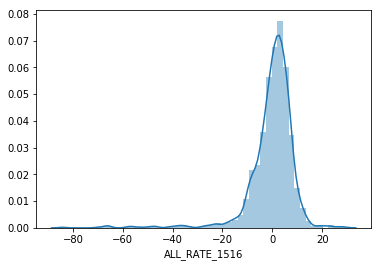

In [90]:
sns.distplot((y_test - predictions))
#the problem with the data is the long left tail. Making the data very unbalanced.

In [91]:
#most likely overfit with all variables
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared: ', metrics.r2_score(y_test, predictions))

MAE:  5.779507625301263
MSE:  91.97289114843554
RMSE:  9.59024979593522
R-squared:  0.22096327553107054


## Model 3 - Using sklearn, reduced to four key variables

In [25]:
large_scaled_reduced = large_scaled[['non_cert_rate','sports_rate','ap_ib_de_rate', 'chronic_absent_rate']]

In [26]:
y = large['ALL_RATE_1516']
X = large_scaled_reduced

In [27]:
X_train_reduce, X_test_reduce, y_train_reduce, y_test_reduce = train_test_split(X, y, test_size=0.3, random_state=102)

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train_reduce, y_train_reduce)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm.coef_

array([-1.46178488,  1.70833397,  0.54506327, -4.37713071])

In [31]:
cdf_reduce = pd.DataFrame(lm.coef_, X_train_reduce.columns, columns=['Coeff'])

In [32]:
predictions_reduce = lm.predict(X_test_reduce)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


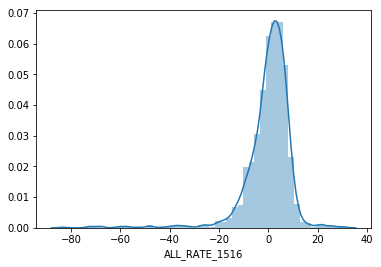

In [33]:
sns.distplot((y_test_reduce - predictions_reduce))

In [34]:
#needs more
print('MAE: ', metrics.mean_absolute_error(y_test_reduce, predictions_reduce))
print('MSE: ', metrics.mean_squared_error(y_test_reduce, predictions_reduce))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_reduce, predictions_reduce)))
print('R-squared: ', metrics.r2_score(y_test_reduce, predictions_reduce))

MAE:  6.0751544704567095
MSE:  99.39505075903959
RMSE:  9.969706653610205
R-squared:  0.15809545829350258


## Model 4 - Using sklearn on all variables with lasso

In [137]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [138]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.3, random_state=102)

In [139]:
scaler = StandardScaler()

In [140]:
X_train_lasso = scaler.fit_transform(X_train_lasso)

In [141]:
X_test_lasso = scaler.transform(X_test_lasso)

In [33]:
# y = large['ALL_RATE_1516']
# X = imputed_numeric_df.drop(['ALL_RATE_1516'], axis=1)

In [142]:
lasso = Lasso()

In [143]:
#default
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
#default alpha = 1
train_score=lasso.score(X_train_lasso,y_train_lasso)
test_score=lasso.score(X_test_lasso,y_test_lasso)
coeff_used = np.sum(lasso.coef_!=0)
predictions_lasso = lasso.predict(X_train_lasso)

In [145]:
print('training score: ', train_score) 
#Returns the coefficient of determination R^2 of the prediction.
print('test score: ', test_score)
print('number of features used: ', coeff_used)

training score:  0.24796506971236532
test score:  0.1922547107643683
number of features used:  6


In [146]:
#change alpha to .1
lasso1 = Lasso(alpha=0.1, max_iter=10e5)
lasso1.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
train_score1=lasso1.score(X_train_lasso,y_train_lasso)
test_score1=lasso1.score(X_test_lasso,y_test_lasso)
coeff_used1 = np.sum(lasso1.coef_!=0)

In [148]:
print('training score for alpha=0.1:', train_score1) 
print('test score for alpha =0.1: ', test_score1)
print('number of features used: for alpha =0.1:', coeff_used1)

training score for alpha=0.1: 0.2881196400810735
test score for alpha =0.1:  0.22139506942881093
number of features used: for alpha =0.1: 14


In [101]:
#change alpha to .01
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
train_score01=lasso01.score(X_train_lasso,y_train_lasso)
test_score01=lasso01.score(X_test_lasso,y_test_lasso)
coeff_used01 = np.sum(lasso01.coef_!=0)

In [103]:
print('training score for alpha=0.01:', train_score01) 
print('test score for alpha =0.01: ', test_score01)
print('number of features used: for alpha =0.01:', coeff_used01)

training score for alpha=0.01: 0.289105706864765
test score for alpha =0.01:  0.22110287742550105
number of features used: for alpha =0.01: 14


In [104]:
#change alpha to .001
lasso001 = Lasso(alpha=0.001, max_iter=10e5)
lasso001.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
train_score001=lasso001.score(X_train_lasso,y_train_lasso)
test_score001=lasso001.score(X_test_lasso,y_test_lasso)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [106]:
print('training score for alpha=0.001:', train_score001) 
print('test score for alpha =0.001: ', test_score001)
print('number of features used: for alpha =0.001:', coeff_used001)

training score for alpha=0.001: 0.2891161665325982
test score for alpha =0.001:  0.22097776995493149
number of features used: for alpha =0.001: 15


In [107]:
#change alpha to .0001
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
train_score0001=lasso0001.score(X_train_lasso,y_train_lasso)
test_score0001=lasso0001.score(X_test_lasso,y_test_lasso)
coeff_used0001 = np.sum(lasso0001.coef_!=0)

In [109]:
print('training score for alpha=0.0001:', train_score0001) 
print('test score for alpha =0.0001: ', test_score0001)
print('number of features used: for alpha =0.0001:', coeff_used0001)

training score for alpha=0.0001: 0.2891162716401945
test score for alpha =0.0001:  0.2209648092975115
number of features used: for alpha =0.0001: 15


In [110]:
#change alpha to .00001
lasso00001 = Lasso(alpha=0.00001, max_iter=10e5)
lasso00001.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
train_score00001=lasso00001.score(X_train_lasso,y_train_lasso)
test_score00001=lasso00001.score(X_test_lasso,y_test_lasso)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [112]:
print('training score for alpha=0.00001:', train_score00001) 
print('test score for alpha =0.00001: ', test_score00001)
print('number of features used: for alpha =0.00001:', coeff_used00001)

training score for alpha=0.00001: 0.28911627271619156
test score for alpha =0.00001:  0.22096342863795193
number of features used: for alpha =0.00001: 15


In [113]:
#change alpha to 5, try a different direction
lasso5 = Lasso(alpha=5, max_iter=10e5)
lasso5.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
train_score5=lasso5.score(X_train_lasso,y_train_lasso)
test_score5=lasso5.score(X_test_lasso,y_test_lasso)
coeff_used5 = np.sum(lasso5.coef_!=0)

In [115]:
print('training score for alpha=5:', train_score5) 
print('test score for alpha =5: ', test_score5)
print('number of features used: for alpha =5:', coeff_used5)

training score for alpha=5: 0.0
test score for alpha =5:  -0.0001803857670559239
number of features used: for alpha =5: 0


In [116]:
print('training score for alpha=0.00001:', train_score000001) 
print('test score for alpha =0.00001: ', test_score000001)
print('number of features used: for alpha =0.00001:', coeff_used000001)

NameError: name 'train_score000001' is not defined

In [134]:
#change alpha to 500, try a different direction
lasso500 = Lasso(alpha=500, max_iter=10e5)
lasso500.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
train_score500=lasso500.score(X_train_lasso,y_train_lasso)
test_score500=lasso500.score(X_test_lasso,y_test_lasso)
coeff_used500 = np.sum(lasso500.coef_!=0)

In [136]:
print('training score for alpha=2:', train_score500) 
print('test score for alpha =2: ', test_score500)
print('number of features used: for alpha =2:', coeff_used500)

training score for alpha=2: 0.0
test score for alpha =2:  -0.0001803857670559239
number of features used: for alpha =2: 0


In [53]:
lasso_regression(imputed_numeric_df, X_train_lasso, alpha_lasso[i], models_to_plot)

[257692.09799599473,
 83.33668587610629,
 0.00044432619638044374,
 4.920534005219606,
 9.45664412148977,
 12.585114956254163,
 -6.6234073334721915,
 7.913425961272134,
 14.454468160901644,
 -25.352693943733907,
 -6.847852313140583e-05,
 6.484455971118854,
 -4.295816122030515,
 -1.473351976491266,
 -19.694507467777292,
 208.7268284201262,
 1.3957132801476824]

## Model 5 - Using Elastic Net with sklearn

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
#target and features to use in prediction
y = large['ALL_RATE_1516']
X = imputed_numeric_df.drop(['ALL_RATE_1516'], axis=1)

In [57]:
X_train_elnet, X_test_elnet, y_train_elnet, y_test_elnet = train_test_split(X, y, test_size=0.3, random_state=102)

In [70]:
regr = ElasticNet(random_state=2)

In [71]:
regr.fit(X_train_elnet, y_train_elnet)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=2, selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
print(regr.coef_)

[ 5.75735744e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.36838298e-01
 -5.87480674e-05  0.00000000e+00 -6.85483060e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [73]:
print(regr.intercept_) # doctest: +ELLIPSIS

87.50288924828584


In [74]:
predictions_elnet = regr.predict(X_test_elnet)

In [69]:
print('MAE: ', metrics.mean_absolute_error(y_test_elnet, predictions_elnet))
print('MSE: ', metrics.mean_squared_error(y_test_elnet, predictions_elnet))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_elnet, predictions_elnet)))
print('R-squared: ', metrics.r2_score(y_test_elnet, predictions_elnet))

MAE:  7.008318505866813
MSE:  115.65862965358102
RMSE:  10.754470217243666
R-squared:  0.020338287980159908


In [54]:
import statsmodels.api as sm

#Regression Model
X_train_elnet = sm.add_constant(X_train_elnet)# adding a constant
model=sm.OLS(y_train_elnet, X_train_elnet).fit_regularized(method='elastic_net', alpha=0.0, L1_wt=.50)
model.summary()